#Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
myDirFiles = "/content/drive/MyDrive/Pandas"
os.chdir(myDirFiles)

#Import Library

In [ ]:
import pandas as pd # Untuk mengolah data
import numpy as np # Untuk mengolah angka
import matplotlib.pylab as plt # Untuk visualisasi
import seaborn as sns # Untuk Visualisasi
%matplotlib inline
from matplotlib.pylab import rcParams #Untuk visualisasi
from datetime import datetime #Untuk mengatasi tipe data tanggal

#Preprocessing

##Read file

In [ ]:
df=pd.read_csv('AirPassengers.csv')

In [ ]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


##Check missing value


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Tidak ada missing value pada data ini

##Check duplicates

In [ ]:
df[df['Month'].duplicated()]

,Month,#Passengers


Tidak ada duplicates pada data ini 

##Mengubah tipe data

Kita lihat bahwa kolom Month bertipe object, maka kita harus mengubahnya menjadi kolom date time.

In [ ]:
df['Month']=pd.to_datetime(df['Month'], format='%Y-%m')
df['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

Kita cek kembali duplicates pada data yang telah diubah tipenya

In [ ]:
df[df['Month'].duplicated()]

,Month,#Passengers


Ternyata tidak ditemukan adanya duplicates

Kita cek kembali tipe data yang telah kita ubah

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Kolom 'Month' sudah berubah tipe datanya menjadi datetime

##Indexing

Langkah berikutnya adalah kita melakukan indexing agar memudahkan dalam hal visualisasi

In [ ]:
df=df.set_index(['Month'])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


##Visualisasi Time Series

Selanjutnya kita akan melakukan visualisasi time-seriesnya

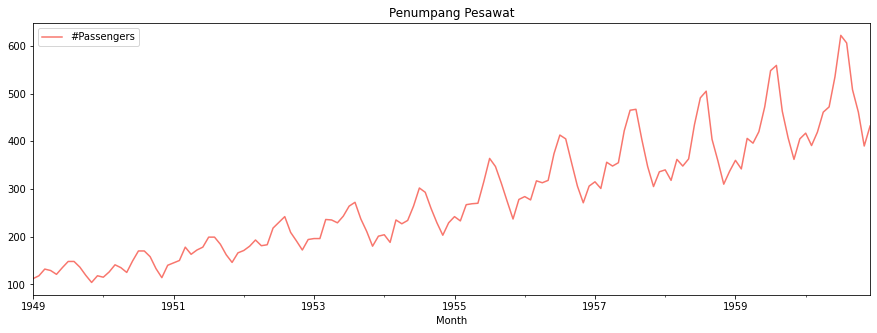

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='-',
        figsize=(15,5),
        color=color_pal[0],
        title='Penumpang Pesawat'
        )
plt.show()

Jika kita lihat pada visualisasi di atas, terlihat beberapa pola yang mirip dari tahun ke tahun

#Modeling

##Spliting Data

Di sini kita akan membagi data menjadi data training dengan data testing. Untuk banyaknya jumlah test size ditentukan oleh banyaknya data
- Jika datanya kecil (ratusan jumlah datanya) pakai 0.2 
- Jika datanya sedang (ribuan jumlah datanya) pakai 0.15
- Jika datanya banyak (jutaan jumlah datanya) pakai 0.1
Karena data kita kecil maka akan digunakan test size 0.2

In [ ]:
test_ratio = 0.2

test_set_size = int(len(df) * test_ratio) #Mengambil jumlah test size
df_train = df[0:-test_set_size].copy() #Mengambil data training dari awal sampai sebelum data test
df_test = df[-test_set_size:].copy() #Mengambil data test

In [ ]:
df_train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-04-01,348
1958-05-01,363
1958-06-01,435


In [ ]:
df_test

,#Passengers
Month,
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


Pada kasus Time Series data test dan train tidak boleh diambil secara random melainkan harus berurutan supaya mesin bisa belajar dari pola-pola terebut,

##Visualisasi Splitting Data

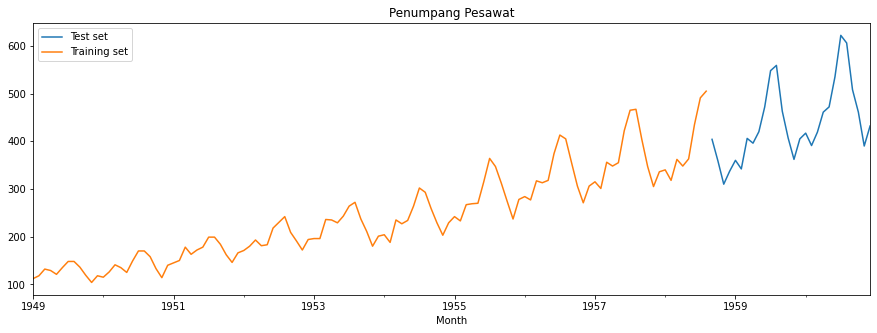

In [ ]:
# Melihat hasil pembagian data kita menggunakan visualisasi
df_test\
.rename(columns={'#Passengers':'Test set'})\
.join(df_train.rename(columns={'#Passengers':'Training set'}), how='outer')\
.plot(figsize=(15,5),title='Penumpang Pesawat',style='')
plt.show()

Terlihat bahwa garis berwarna orange adalah data training sedangkan garis biru menunjukan data testing

#Fbprophet

##Import Library

In [ ]:
# Import Library yang akan digunakan untuk memprediksi Time-Series (FbProphet)
from prophet import Prophet

##Reindexing

In [ ]:
# Mengembalikan kolom Month ke bentuk semula (sebelum jadi index)
df_train.reset_index(inplace=True)
df_test.reset_index(inplace = True)

##Rename

In [ ]:
# Mengubah nama kolom sesuai dengan anturan dari FBProphet
df_train.rename(columns={'Month':'ds','#Passengers':'y'},inplace=True)
df_test.rename(columns={'Month':'ds','#Passengers':'y'},inplace=True)

In [ ]:
df_train

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
111,1958-04-01,348
112,1958-05-01,363
113,1958-06-01,435
114,1958-07-01,491


In [ ]:
df_test

,ds,y
0,1958-09-01,404
1,1958-10-01,359
2,1958-11-01,310
3,1958-12-01,337
4,1959-01-01,360
5,1959-02-01,342
6,1959-03-01,406
7,1959-04-01,396
8,1959-05-01,420
9,1959-06-01,472


Penamaan untuk FBProphet harus sesuai aturan di mana sumbu x = ds, dan sumbu y=y

##Model Prophet

In [ ]:
#Memanggil model FbProphet
model = Prophet()

In [ ]:
# Kita ingin melatih model machine learning kita
model.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph58kk3jg/th0g9ngd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph58kk3jg/ww3q9esc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3358', 'data', 'file=/tmp/tmph58kk3jg/th0g9ngd.json', 'init=/tmp/tmph58kk3jg/ww3q9esc.json', 'output', 'file=/tmp/tmpb6k44buh/prophet_model-20220921144013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Kita ingin memprediksi menggunakan model machine learning kita
pred = model.predict(df_test)

In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1958-09-01,408.740719,402.524484,444.815724,408.739576,408.740719,13.802935,13.802935,13.802935,13.802935,13.802935,13.802935,0.0,0.0,0.0,422.543654
1,1958-10-01,411.914826,371.310823,414.846891,411.890808,411.933936,-19.882537,-19.882537,-19.882537,-19.882537,-19.882537,-19.882537,0.0,0.0,0.0,392.032289
2,1958-11-01,415.194736,343.669832,387.580102,415.130931,415.252344,-49.234756,-49.234756,-49.234756,-49.234756,-49.234756,-49.234756,0.0,0.0,0.0,365.959980
3,1958-12-01,418.368843,371.022778,415.600495,418.247064,418.478700,-25.287974,-25.287974,-25.287974,-25.287974,-25.287974,-25.287974,0.0,0.0,0.0,393.080869
4,1959-01-01,421.648753,378.386720,422.333787,421.460021,421.818823,-21.690880,-21.690880,-21.690880,-21.690880,-21.690880,-21.690880,0.0,0.0,0.0,399.957873
5,1959-02-01,424.928664,377.431759,420.299732,424.662950,425.149695,-26.516013,-26.516013,-26.516013,-26.516013,-26.516013,-26.516013,0.0,0.0,0.0,398.412650
6,1959-03-01,427.891164,406.327667,449.776228,427.558036,428.171316,1.382529,1.382529,1.382529,1.382529,1.382529,1.382529,0.0,0.0,0.0,429.273692
7,1959-04-01,431.171074,400.921675,446.163292,430.756417,431.540782,-6.939215,-6.939215,-6.939215,-6.939215,-6.939215,-6.939215,0.0,0.0,0.0,424.231858
8,1959-05-01,434.345181,408.182855,451.194530,433.862172,434.791981,-4.334321,-4.334321,-4.334321,-4.334321,-4.334321,-4.334321,0.0,0.0,0.0,430.010859
9,1959-06-01,437.625091,440.772134,484.632670,437.065990,438.152813,25.274845,25.274845,25.274845,25.274845,25.274845,25.274845,0.0,0.0,0.0,462.899937


Akan banyak sekali data yang muncul tetapi kita hanya concern terhadap yhat saja

In [ ]:
pred['yhat']

0     422.543654
1     392.032289
2     365.959980
3     393.080869
4     399.957873
5     398.412650
6     429.273692
7     424.231858
8     430.010859
9     462.899937
10    499.527500
11    495.229072
12    461.291971
13    431.020669
14    404.842760
15    432.365889
16    437.556453
17    438.098830
18    471.986249
19    464.601263
20    464.521165
21    505.552936
22    532.802388
23    538.741168
24    499.688037
25    468.679691
26    442.828476
27    469.034466
Name: yhat, dtype: float64

##Menghitung Error

Selanjutnya kita akan mencoba menghitung error dari model yang telah kita buat

In [ ]:
#Import library 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Dikarenakan machine learning sensitif terhadap tipe data yang berbeda, maka di sini kita akan membuat tipe data yang dimasukan ke machine learning menjadi tipe yang sama

In [ ]:
#mengubah yhat menjadi integer
pred['yhat'] = pred['yhat'].astype(int)

In [ ]:
pred['yhat']

0     422
1     392
2     365
3     393
4     399
5     398
6     429
7     424
8     430
9     462
10    499
11    495
12    461
13    431
14    404
15    432
16    437
17    438
18    471
19    464
20    464
21    505
22    532
23    538
24    499
25    468
26    442
27    469
Name: yhat, dtype: int64

In [ ]:
mean_squared_error(df_test['y'],pred['yhat'])

1661.6785714285713

In [ ]:
mean_absolute_error(df_test['y'],pred['yhat'])

34.25

Di sini terlihat bahwa mean absolute error adalah model terbaik untuk melihat error pada data yang digunakan

##Visualisasi hasil prediksi

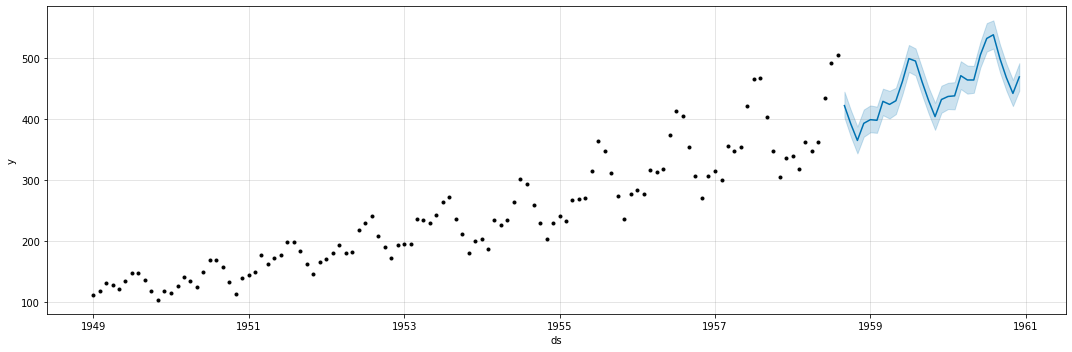

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pred, ax=ax)
plt.show()

##Visualisasi Perbandingan

Berikut adalah Visualisai hasil prediksi machine learning

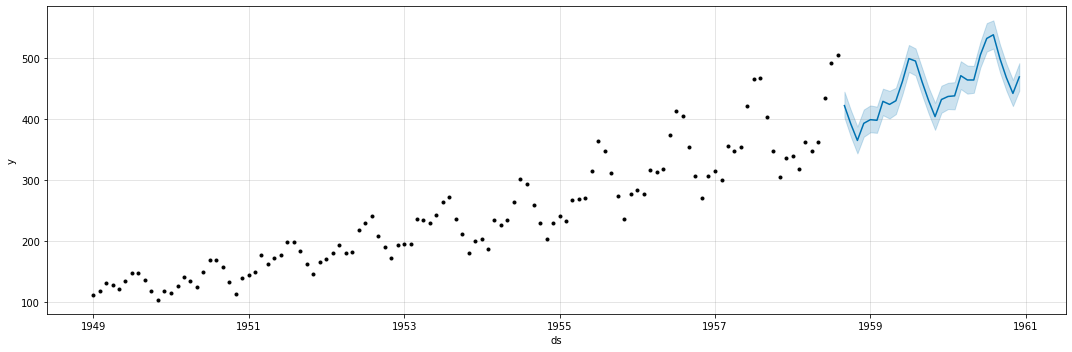

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pred, ax=ax)
plt.show()

Ini adalah Visualisasi perbandingan antara hasil prediksi machine learning dengan data yang asli

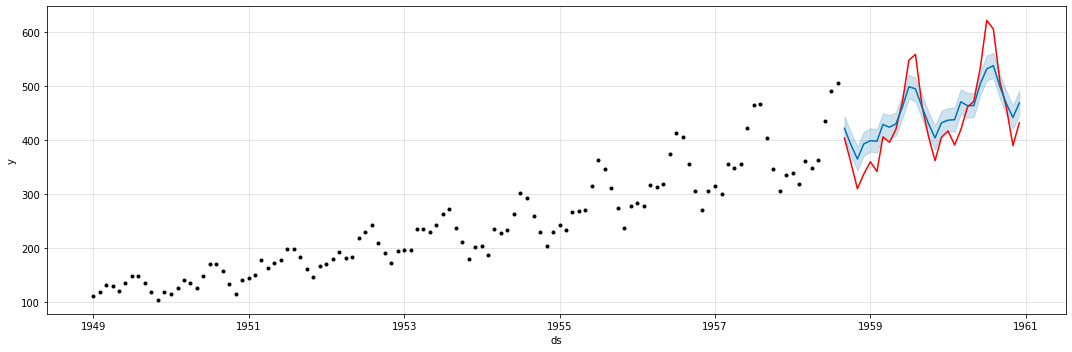

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_test['ds'],df_test['y'],color='r')
fig = model.plot(pred, ax=ax)
plt.show()

##Prediction

Untuk melakukan prediksi maka kita harus membuat dataframe baru

In [ ]:
next_pred = pd.DataFrame(columns=['ds','y'])

In [ ]:
## Masukan tanggal yang kita inginkan untuk diprediksi
next_pred['ds']=pd.date_range(start='1961-01-01', periods=12, freq='MS')

In [ ]:
next_pred

,ds,y
0,1961-01-01,NaN
1,1961-02-01,NaN
2,1961-03-01,NaN
3,1961-04-01,NaN
4,1961-05-01,NaN
5,1961-06-01,NaN
6,1961-07-01,NaN
7,1961-08-01,NaN
8,1961-09-01,NaN
9,1961-10-01,NaN


Selanjutnya kita akan mengisi nilai NaN pada y

In [ ]:
next_pred_model = model.predict(next_pred)

In [ ]:
next_pred_model

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1961-01-01,498.991156,457.653055,501.208375,495.786672,502.091179,-19.664532,-19.664532,-19.664532,-19.664532,-19.664532,-19.664532,0.0,0.0,0.0,479.326624
1,1961-02-01,502.271067,449.509662,495.939452,498.897536,505.536167,-28.652147,-28.652147,-28.652147,-28.652147,-28.652147,-28.652147,0.0,0.0,0.0,473.618919
2,1961-03-01,505.233566,487.005484,533.921782,501.663809,508.646010,4.060384,4.060384,4.060384,4.060384,4.060384,4.060384,0.0,0.0,0.0,509.293951
3,1961-04-01,508.513477,479.610679,525.311197,504.779899,512.140868,-5.877035,-5.877035,-5.877035,-5.877035,-5.877035,-5.877035,0.0,0.0,0.0,502.636441
4,1961-05-01,511.687584,480.826088,527.322615,507.754061,515.458380,-7.152061,-7.152061,-7.152061,-7.152061,-7.152061,-7.152061,0.0,0.0,0.0,504.535523
5,1961-06-01,514.967494,521.141201,565.789281,510.896994,518.905226,27.893696,27.893696,27.893696,27.893696,27.893696,27.893696,0.0,0.0,0.0,542.861190
6,1961-07-01,518.141601,549.046017,594.609253,513.944342,522.315013,55.118133,55.118133,55.118133,55.118133,55.118133,55.118133,0.0,0.0,0.0,573.259734
7,1961-08-01,521.421511,553.987886,597.985375,517.022524,525.834755,54.374498,54.374498,54.374498,54.374498,54.374498,54.374498,0.0,0.0,0.0,575.796009
8,1961-09-01,524.701422,516.358363,561.489247,520.039685,529.349866,13.693843,13.693843,13.693843,13.693843,13.693843,13.693843,0.0,0.0,0.0,538.395265
9,1961-10-01,527.875528,484.549949,529.923096,523.023497,532.726135,-20.237589,-20.237589,-20.237589,-20.237589,-20.237589,-20.237589,0.0,0.0,0.0,507.637940


Seperti cara sebelumnya, hanya yhat saja yang kita fokuskan

In [ ]:
next_pred_model[['ds','yhat']]

,ds,yhat
0,1961-01-01,479.326624
1,1961-02-01,473.618919
2,1961-03-01,509.293951
3,1961-04-01,502.636441
4,1961-05-01,504.535523
5,1961-06-01,542.861190
6,1961-07-01,573.259734
7,1961-08-01,575.796009
8,1961-09-01,538.395265
9,1961-10-01,507.637940


Visualisasi hasil prediksi machine learning


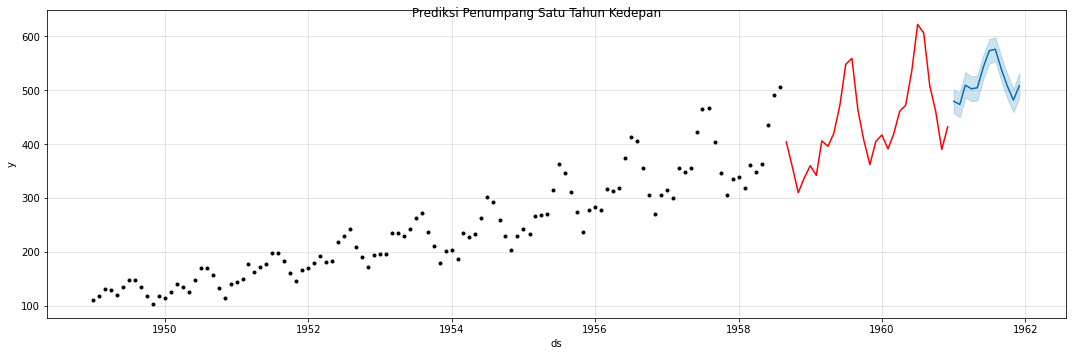

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_test['ds'], df_test['y'], color='r')
fig = model.plot(next_pred_model,
                 ax=ax)
fig = plt.suptitle("Prediksi Penumpang Satu Tahun Kedepan")
plt.show()

Dapat kita lihat garis biru merupakan hasil prediksi yang kita buat. Terlihat memiliki kesamaan dalam bentuk pola dengan data sebelumnya